<hr style="height:10px"> 
 
<div class='container2'>
	<div style='padding: 0 7em 2em 0em;'>
	<h1>Trabalho de Inteligência Artificial</h1>
    <h3> <a href="https://github.com/amandakouchi">Amanda Kouchi</a> &#x25CF; <a href="https://github.com/biarog">Beatriz Rogers</a> &#x25CF; <a href="https://github.com/matteoavan">Matteo Savan</a> &#x25CF; <a href="https://github.com/RaulYKomai">Raul Y. Komai</a>
	</div>
</div>


 <hr style="height:5px"> 

    
<h2>Algoritmos e Avaliação em Agrupamento</h2>

## Introdução

Neste *notebook*, será feito o uso de três algoritmos de agrupamento para podermos analisar cada um dos algorítmos e seus usos ideais. O banco de dados utilizado foi providenciado pela nossa Profª Drª Katti Facelli.

Os três algoritmos que faremos uso neste estudo são os seguintes: K-médias, Single-Link e Complete-Link.

---

## Recursos Necessários

Para este *notebook*, deve ser utilizado o `Python 3.6` ou superior com as seguintes bibliotecas externas, que deverão ser instaladas:

* [`matplotlib`](versão 3.9.2 ou superior): construção e exibição de gráficos variados
* [`numpy`](versão 2.1 ou superior): manipulação de dados em formato de vetores e matrizes
* [`pandas`](versão 2.2.2 ou superior): manipulação de dados em formato de tabelas
* [`sklearn`](versão x.x ou superior): completar
* [`seaborn`]versão x.x ou superior): completar

A biblioteca [`os`](https://docs.python.org/3/library/os.html), para realizar tarefas específicas ao Sistema Operacional, também será utilizada. Por fazer parte da [Biblioteca Padrão de Python](https://docs.python.org/pt-br/3/library/), sua instalação não é necessária.

Serão utilizados também os conjuntos de dados disponibilizados junto com este *notebook*, que se encontram no diretório `datasets`, em formato de arquivo `.txt`.

In [103]:
## Imports
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn import cluster 
from sklearn.cluster import KMeans
from scipy.spatial import distance_matrix
import seaborn as sns
import sys

%matplotlib inline

DATASETS_DIR = 'datasets'

In [5]:
## Função auxiliar para carregar dados
def load_dataset(dataset_name):
    dataset = pd.read_csv(os.path.join(DATASETS_DIR, dataset_name+'.txt'), sep='\t', index_col = 0)
    return dataset

In [6]:
## Função auxiliar para plottar os dados de entrada
def plot_entry_data(data) -> None:
    X = data[['d1', 'd2']]
    plt.scatter(X["d1"],X["d2"], c="red")
    plt.xlabel("d1")
    plt.ylabel("d2")
    plt.show()

In [7]:
## Funcao auxiliar para definir o dataframe apos a agregacao
def create_df(data, clusters):
    df = pd.DataFrame(data)
    df.columns = ["d1","d2"]
    df["cluster"] = clusters
    
    return df

In [8]:
## Função auxiliar para plottar após funcao de agregacao
def plot_grouped_data(df, n_clusters) -> None:
    cores = sns.color_palette()[0:n_clusters]
    df = df.sort_values("sample_label")
    sns.scatterplot(data = df, x=df["d1"], y=df["d2"], hue=df["cluster"], palette=cores)
    plt.show()

In [9]:
## Funcao auxiliar de exportar arquivo
def export_dataframe(df, n_group, n_arquivo) -> None :
    select = ['sample_label', 'cluster']
    select = [x for x in df.columns if x in select]
    export = df[select]
    export.to_csv(n_arquivo + '_' + n_group + '.csv')

---
## K-médias

Adicionar descrição do processo de kmédias

In [14]:
## Entrada de dados
maxiter = 1
k = 10
nome_arquivo = 'monkey'

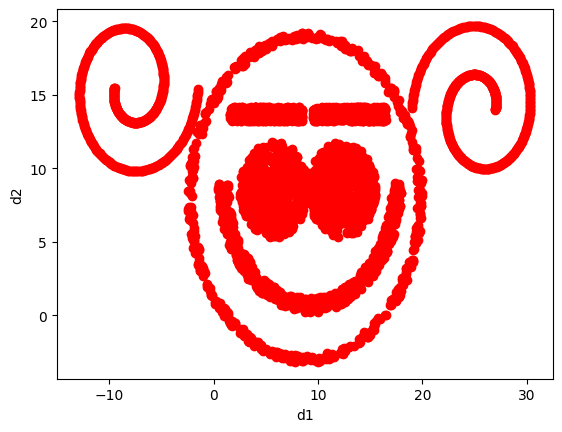

In [15]:
dados = load_dataset(nome_arquivo)
plot_entry_data(data=dados)

In [16]:
## Iniciar centróides
X = dados[['d1', 'd2']]
def initiate_centroids(k,dset):
    centroides = dset.sample(k)
    return centroides

np.random.seed(86)
centroids = initiate_centroids(k,X)

In [17]:
## Função de distância
def rsserr(a,b):
    return np.square(np.sum((a-b)**2)) 

In [18]:
## Atribuição de das amostras aos centróides
def centroid_assignation(dset, centroids):
    k = centroids.shape[0]
    n = dset.shape[0]
    assignation = []
    assign_errors = []

    for obs in range(n):
        # Estimate error
        all_errors = np.array([])
        for centroid in range(k):
            err = rsserr(centroids.iloc[centroid, :], dset.iloc[obs,:])
            all_errors = np.append(all_errors, err)

        # Get the nearest centroid and the error
        nearest_centroid =  np.where(all_errors==np.amin(all_errors))[0].tolist()[0]
        nearest_centroid_error = np.amin(all_errors)

        # Add values to corresponding lists
        assignation.append(nearest_centroid)
        assign_errors.append(nearest_centroid_error)

    return assignation, assign_errors

In [22]:
## Função do K-médias
def kmeans(dset, k, maxiter):
    working_dset = dset.copy()
    err = []
    
    centroids = initiate_centroids(k, dset)

    for i in range(maxiter):
        working_dset['centroid'], j_err = centroid_assignation(working_dset, centroids) 
        err.append(sum(j_err))
        centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop = True)

    working_dset['centroid'], j_err = centroid_assignation(working_dset, centroids)
    centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop = True)
    return working_dset['centroid'], j_err, centroids

In [23]:
## Execução do K-médias
np.random.seed(86)
X['centroid'], X['error'], centroids =  kmeans(X[['d1','d2']], k, maxiter)

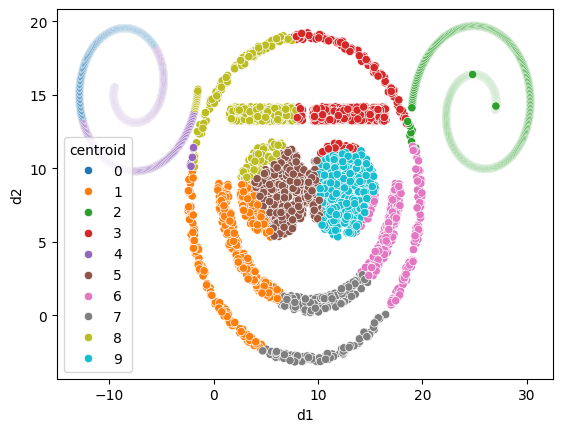

In [24]:
## Plotar após k-médias
df = pd.DataFrame(X)
df.columns = ['d1','d2', 'centroid', 'error']
cores = sns.color_palette()[0:k]
sns.scatterplot(data = df, x=df["d1"], y=df["d2"], hue=df["centroid"], palette=cores)
plt.show()

In [209]:
## Exportar arquivo
select_ = ['sample_label', 'centroid']
select = [x for x in df.columns if x in select_]
export = df[select]
export.to_csv(nome_arquivo + '.csv')

---
## Single-Link

In [152]:
## Entrada de dados
numero_clusters = 5
nome_arquivo = 'c2ds3-2g'

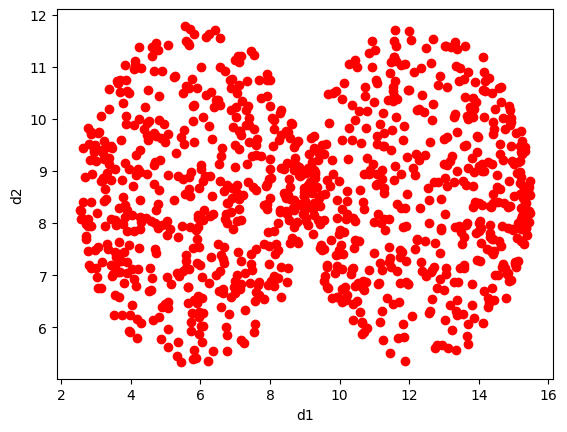

In [153]:
## Carregando dados e plottando grafico inicial
dados = load_dataset(nome_arquivo)
plot_entry_data(data=dados)

In [154]:
## Cálculo Matriz de Distância
matrix_despacial = distance_matrix(dados, dados, p=2)

In [155]:
## Função de Single Link
def single_link(m_distancias:np, n_clusters:int):
    single = [-1]*len(m_distancias)
    total_clusters = len(m_distancias)
    counter:int = 0
    cluster_id:int = -1
    
    if total_clusters > n_clusters:      
        while(total_clusters > n_clusters): 
            n_menos1 = 0
            line:int = 0
            column:int = 0
            
            cluster:bool = True
            
            shortest_dist = np.min(m_distancias[m_distancias>0])
            line = np.where(m_distancias == shortest_dist)[0][0]
            column = np.where(m_distancias == shortest_dist)[1][0]
            
            if single[line] < 0 and single[column] < 0:
                cluster = False
            
            if cluster:
                
                if single[line] >= 0:
                    cluster_id = -single[line] -1
                elif single[column] >= 0:
                    cluster_id = -single[column] -1
                
                matrix_despacial[column][line] = matrix_despacial[line][column] = cluster_id
                
                idx_column = idx_line = -1
                for idx_n, n in enumerate(single):
                    if n == single[column] and idx_n != column and n > -1:
                        idx_column = idx_n
                        single[idx_column] = -cluster_id - 1
                        matrix_despacial[idx_column][column] = matrix_despacial[column][idx_column] = cluster_id
                        matrix_despacial[idx_column][line] = matrix_despacial[line][idx_column] = cluster_id
                    elif n == single[line] and idx_n != line and n > -1:
                        idx_line = idx_n
                        single[idx_line] = -cluster_id - 1
                        matrix_despacial[idx_line][column] = matrix_despacial[column][idx_line] = cluster_id
                        matrix_despacial[idx_line][line] = matrix_despacial[line][idx_line] = cluster_id
                    if idx_column > -1 and idx_line > -1:
                        matrix_despacial[idx_line][idx_column] = matrix_despacial[idx_column][idx_line] = cluster_id
                
                single[line] = single[column] = -cluster_id - 1

            else :
                m_distancias[column][line] = m_distancias[line][column] = -counter - 1
                single[line] = single[column] = counter
                counter += 1

            ## Atualizar distâncias
            for idx_x in range(len(m_distancias)):
                if m_distancias[line][idx_x] <= m_distancias[column][idx_x] and m_distancias[line][idx_x] > 0:
                    m_distancias[column][idx_x] = m_distancias[idx_x][column] = m_distancias[line][idx_x]
                elif m_distancias[line][idx_x] > m_distancias[column][idx_x] and m_distancias[column][idx_x] > 0:
                    m_distancias[line][idx_x] = m_distancias[idx_x][line] = m_distancias[column][idx_x]
            
            ## Contar quantos elementos "estão sem cluster"
            for x in single:
                if x == -1:
                    n_menos1 += 1
            
            ## Contar "quantos clusters tem"
            total_clusters = len(set(single)) + n_menos1
            
            if n_menos1 > 0:
                total_clusters -= 1
                
            if total_clusters == n_clusters:
                break
    

    ## Atribuir cluster para os "que não tem cluster"
    for idx_n, n in enumerate(single):
        if n == -1:
            single[idx_n] = max(single) + 1

    return single

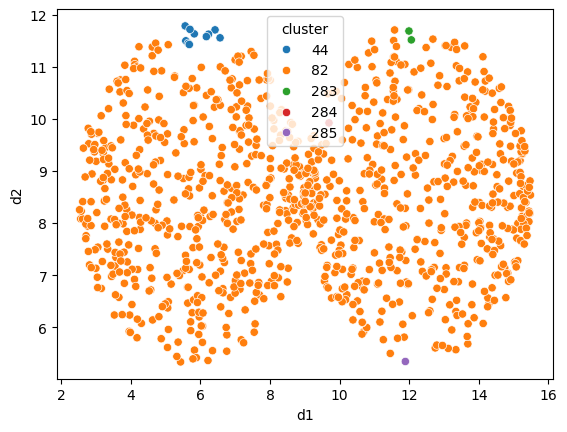

In [156]:
single = single_link(matrix_despacial, numero_clusters)
dataframe = create_df(data=dados, clusters=single)
plot_grouped_data(df=dataframe, n_clusters=numero_clusters)

In [ ]:
df = create_df(dados, numero_clusters)
plot_grouped_data(df, numero_clusters)
export_dataframe(df, 'single_link', nome_arquivo)

---
## Complete-Link

In [157]:
## Entrada de dados
numero_clusters = 2
nome_arquivo = 'c2ds1-2sp'
#nome_arquivo = 'testando'

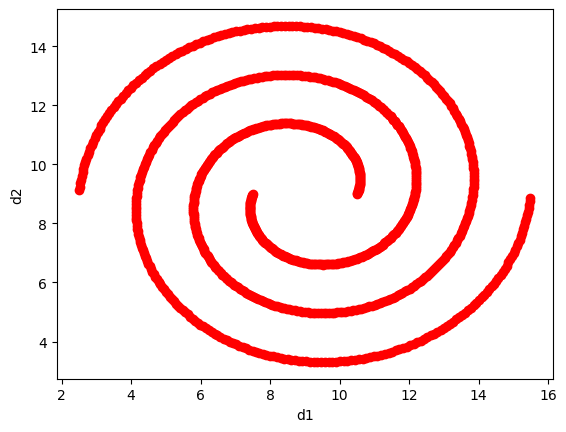

In [158]:
## Carregando dados e plottando grafico inicial
dados = load_dataset(nome_arquivo)
plot_entry_data(data=dados)

In [159]:
## Cálculo Matriz de Distância
matrix_despacial = distance_matrix(x=dados.values, y=dados.values)

In [160]:
## Função de Complete Link
def complete_link(m_distancias:np, n_clusters:int):
    complete = [-1]*len(m_distancias)
    total_clusters = len(m_distancias)
    counter:int = 0
    cluster_id:int = -1
    
    if total_clusters > n_clusters:      
        while(total_clusters > n_clusters): 
            n_menos1 = 0
            line:int = 0
            column:int = 0
            
            cluster:bool = True
            
            shortest_dist = np.min(m_distancias[m_distancias>0])
            line = np.where(m_distancias == shortest_dist)[0][0]
            column = np.where(m_distancias == shortest_dist)[1][0]
            
            if complete[line] < 0 and complete[column] < 0:
                cluster = False
            
            ###############
            if cluster:
            # Instancias onde o menor valor é repetido (no caso de ter um cluster sempre vai ter)
                tds_instancias = list(set(np.where(m_distancias == shortest_dist)[0]))
                
                # Garantindo que sejam pegos 2 clusters distintos 
                prim_cluster_a_se_juntar = complete[tds_instancias[0]] # seria o a
                seg_cluster_a_Se_juntar:int # isso seria o z do exemplo
                
                for n in tds_instancias:
                    if complete[n] != prim_cluster_a_se_juntar:
                        seg_cluster_a_Se_juntar = complete[n]
                        break
                
                # Criando um vetor somente com os idxs dos clusters a serem utilizados
                instancias_usadas = []
                
                for n in tds_instancias:
                    if complete[n] == prim_cluster_a_se_juntar:
                        instancias_usadas.append(n)
                        if complete[n] == -1:
                            break
                
                for n in tds_instancias:
                    if complete[n] == seg_cluster_a_Se_juntar:
                        instancias_usadas.append(n)
                        if complete[n] == -1:
                            break
                               
                
                # Pega o maior valor da tabela entre as colunas de cada instancia
                for col in range(m_distancias.shape[1]):
                    maior = max(m_distancias[instancias_usadas, col])
                    m_distancias[instancias_usadas, col] = maior
                    m_distancias[col, instancias_usadas] = maior
                
                for n in instancias_usadas:
                    if prim_cluster_a_se_juntar != -1:
                        complete[n] = prim_cluster_a_se_juntar
                    else:
                        complete[n] = seg_cluster_a_Se_juntar
                    
                    matrix_despacial[n][instancias_usadas] = -complete[n] -1   
            ###############

            else :
                m_distancias[column][line] = m_distancias[line][column] = -counter - 1
                complete[line] = complete[column] = counter
                counter += 1

            ## Atualizar distâncias  ## Atualizar aki para o single-link
            for idx_x in range(len(m_distancias)): ## idx_x in range(tamanho da tabela)
                if m_distancias[line][idx_x] >= m_distancias[column][idx_x] and m_distancias[column][idx_x] > 0:
                    m_distancias[column][idx_x] = m_distancias[idx_x][column] = m_distancias[line][idx_x] ## É x mesmo?
                elif m_distancias[line][idx_x] < m_distancias[column][idx_x] and m_distancias[line][idx_x] > 0:
                    m_distancias[line][idx_x] = m_distancias[idx_x][line] = m_distancias[column][idx_x] #m_distancias[column][idx_x]
            
            ## Contar quantos elementos "estão sem cluster"
            for x in complete:
                if x == -1:
                    n_menos1 += 1
            
            ## Contar "quantos clusters tem"
            total_clusters = len(set(complete)) + n_menos1
            
            if n_menos1 > 0:
                total_clusters -= 1
                
            if total_clusters == n_clusters:
                break
    

    ## Atribuir cluster para os "que não tem cluster"
    for idx_n, n in enumerate(complete):
        if n == -1:
            complete[idx_n] = max(complete) + 1

    return complete

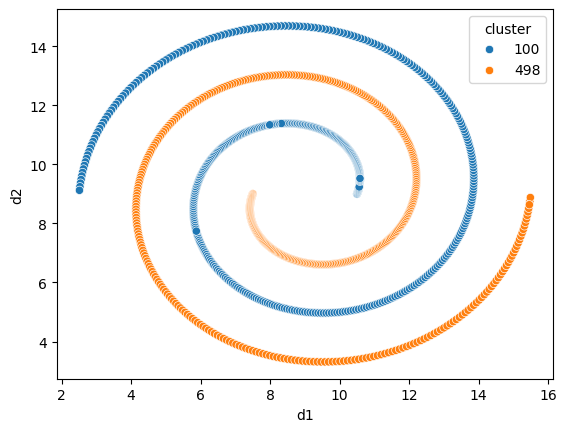

In [161]:
complete = complete_link(matrix_despacial, numero_clusters)
dataframe = create_df(data=dados, clusters=complete)

plot_grouped_data(df=dataframe, n_clusters=numero_clusters)

In [39]:
export_dataframe(df, 'complete_link', nome_arquivo)

NameError: name 'df' is not defined

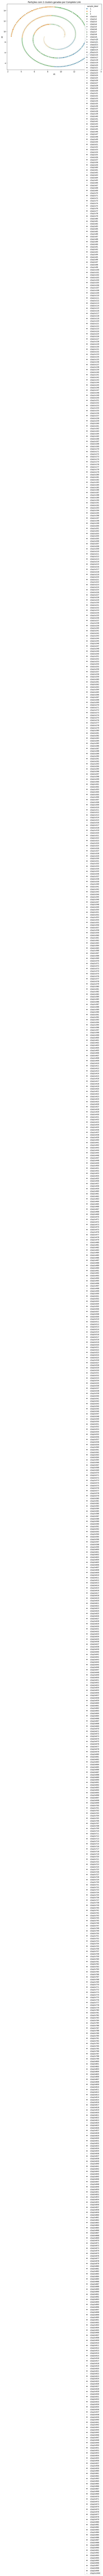

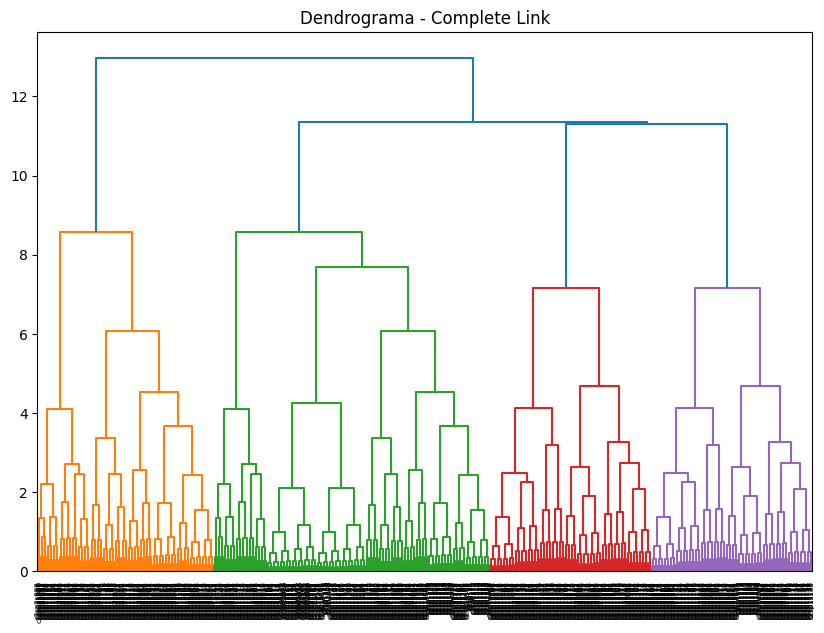

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

# Ler o arquivo de dados
arquivo = 'C:/Users/matte/Desktop/Trabalho-de-IA/datasets/c2ds1-2sp.txt'  # Substitua pelo caminho do arquivo
dados = pd.read_csv(arquivo, delimiter='\t')  # Assumindo tabulação

# Separar as coordenadas e labels
labels = dados['sample_label']
coordenadas = dados[['d1', 'd2']]

# Aplicar o algoritmo de Complete Link (máxima distância)
Z = linkage(coordenadas, method='complete')

# Gerar as partições com exatamente 2 clusters
clusters = fcluster(Z, 3, criterion='maxclust')

# Plotar o gráfico da partição
plt.figure(figsize=(10, 7))
sns.scatterplot(x='d1', y='d2', hue=clusters, data=dados, palette='tab10', style=labels)

# Adicionar títulos e mostrar o gráfico
plt.title('Partições com 2 clusters geradas por Complete Link')
plt.show()

# Opcional: plotar o dendrograma para visualizar a hierarquia
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=labels.values)
plt.title('Dendrograma - Complete Link')
plt.show()


---
## S-rand

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.cluster import adjusted_rand_score

# abaixo é o que devemos fazer para um arquivo mas devemos fazer para os outros:

# pegando os dados:
resultado_correto = open('C:/Users/matte/OneDrive/UFSCAR/2024_1/IA/trabalho de ia/resultado_real.clu', 'r') #abrindo o arquivo para leitura. Aqui tem o arquivo com o agrupamento real
vetor_resultado_correto = []
resultado_alcancado = open('C:/Users/matte/OneDrive/UFSCAR/2024_1/IA/trabalho de ia/resultado_raul.clu', 'r') #abrindo o arquivo para leitura. Aqui tem o arquivo com o agrupamento que conseguimos em algum dos agrupamento que implementamos
vetor_resultado_alcancado = []

conteudo = resultado_alcancado.readline() #aqui lemos só para não pegar aquela primeira linha com a legenda das colunas

# coletando os dados do arquivo do que se espera:
while(True):
    conteudo = resultado_correto.readline() #lê linha

    if (not conteudo): #se alcançar o final do arquivo
        break #pare

    numero_cluster = conteudo[len(conteudo)-2] #descontamos 1 do \n e descontamos 1 para garantir a posição correta
    vetor_resultado_correto.append(numero_cluster)

# coletando os dados do arquivo do que se alcançou:
while(True):
    conteudo = resultado_alcancado.readline()
    if (not conteudo):
        break
    numero_cluster = conteudo[len(conteudo)-2]  
    vetor_resultado_alcancado.append(numero_cluster)

#para testar o vetores criados:
#print("PRINTANDO OS VETORES:")
#print(vetor_resultado_correto)
#print(vetor_resultado_alcancado)

rand = adjusted_rand_score(vetor_resultado_correto, vetor_resultado_alcancado)
print("indice Rand alcançado: " + str(rand))

---
## Conclusão